## Probe mapping for 1x32Buzaki, 2x32Buzaki and 4X32Buzaki probes that used for Ca1 recording
This script creates a dictionary to match the probe channels with the intan channels. This is used to create the ktan.recording.channels and ktan.oscilloscope.group.channels files.

The label on the pcb plate points towards the front of the mouse. The intan chip on the amplifier also points towards the front.

1x32 Buzaki probes that we used to record from 2 animals: mn5824, mn2713

In [3]:

%matplotlib inline
%load_ext autoreload
%autoreload 2 

from autopipy.project import Project
import matplotlib.pyplot as plt
import itertools
import os
import numpy as np
import pandas as pd
import os.path
import autopipy
import spikeA

In [4]:
projectName="autopi_ca1"
dataPath="/adata/projects/autopi_ca1"
dlcModelPath="/adata/models"
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)

# read a file with the session names
fn=myProject.dataPath+"/sessionList"
print("Reading " + fn)
sessionNames= pd.read_csv(fn) # this will be a pandas dataframe

# create a list of session object in the project object
myProject.createSessionList(sessionNameList=sessionNames.sessionName.to_list())
print("We have {} recording sessions".format(len(myProject.sessionList)))
#sessionNames

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 36 recording sessions


In [5]:
shank=[1,2,3,4]
shank_1x32Buzaki_num= list(itertools.chain.from_iterable(itertools.repeat(x, 8) for x in shank))
shank_2x32Buzaki_num= shank_1x32Buzaki_num + shank_1x32Buzaki_num
shank_4x32Buzaki_num=shank_2x32Buzaki_num +shank_2x32Buzaki_num

lst = ['right','left']
lst_1prob = ['right']
Buzaki_1x32_hem= list(itertools.chain.from_iterable(itertools.repeat(x, 32) for x in lst_1prob))
Buzaki_2x32_hem=list(itertools.chain.from_iterable(itertools.repeat(x, 32)for x in lst))
Buzaki_4x32_hem=list(itertools.chain.from_iterable(itertools.repeat(x, 64)for x in lst))


In [8]:
import os.path
dataPath="/adata/projects/autopi_ca1"
for i in range(len(sessionNames)):
    ses= sessionNames.sessionName[i]
    mouse= sessionNames.sessionName[i].split('-')[0]
    sesdir= dataPath+'/'+mouse+'/'+ses+ '/'
    ch_map_phy = np.load(f"{sesdir}channel_map.npy")
    ch_posi_phy = np.load(f"{sesdir}channel_positions.npy")
    fn= sesdir+ses+'.channel_map_no_probe_posi.npy' # file to save 
    nch=len(ch_map_phy)
    if nch==32:
        channels=ch_map_phy.tolist()
        Buzaki_32=pd.DataFrame({'intan':channels ,'hemispher': Buzaki_1x32_hem, 'shank': shank_1x32Buzaki_num})
        with open(fn, 'wb') as f:
            np.save(f, Buzaki_32.to_numpy)
    elif nch== 64:
        channels=ch_map_phy.tolist()
        Buzaki_2x32=pd.DataFrame({'intan':channels ,'hemispher': Buzaki_2x32_hem, 'shank': shank_2x32Buzaki_num})
        with open(fn, 'wb') as f:
            np.save(f, Buzaki_2x32.to_numpy)
    elif nch==128:
        channels=ch_map_phy.tolist()
        Buzaki_4x32=pd.DataFrame({'intan':channels ,'hemispher': Buzaki_4x32_hem, 'shank': shank_4x32Buzaki_num})
        with open(fn, 'wb') as f:
            np.save(f, Buzaki_4x32.to_numpy)


Add the probe number in addition to the intan channel number 

In [9]:
probe_1x32Buzaki_channels = [1,8,2,7,3,6,4,5,9,16,10,15,11,14,12,13,17,24,18,
                  23,19,22,20,21,25,32,26,31,27,30,28,29]

intan_1x32Buzaki_channels=[31,17,30,16,29,25,27,26,18,28,20,24,21,19,22,23,3,13,
                7,11,12,10,8,9,14,0,15,1,6,2,5,4]


2x32 Buzaki channels ... we used them for 2 animals for the ca1 recording:  mn2739 and mn711 

In [10]:
probe_2x32Buzaki_channels = [1,8,2,7,3,6,4,5,9,16,10,15,11,14,12,13,17,24,18,
                             23,19,22,20,21,25,32,26,31,27,30,28,29,1,8,2,7,3,
                             6,4,5,9,16,10,15,11,14,12,13,17,24,18,23,19,22,20,
                             21,25,32,26,31,27,30,28,29]

intan_2x32Buzaki_channels= [1,2,3,0,5,13,9,11,4,7,8,15,10,6,12,14,57,58,49,54,56,
                            52,48,50,60,63,62,61,51,59,53,55,30,29,28,31,26,18,22,
                            20,27,24,23,16,21,25,19,17,38,37,46,41,39,43,47,45,35,
                            32,33,34,44,36,42,40]



4x32 Buzaki ch probes that used in 4 animals: mn1173, mn5618, TYY9524, TYY5622


In [11]:
probe_4x32Buzaki_channels = [1,8,2,7,3,6,4,5,9,16,10,15,11,14,12,13,17,24,18,
                             23,19,22,20,21,25,32,26,31,27,30,28,29,1,8,2,7,3,
                             6,4,5,9,16,10,15,11,14,12,13,17,24,18,23,19,22,20,
                             21,25,32,26,31,27,30,28,29,1,8,2,7,3,6,4,5,9,16,10,
                             15,11,14,12,13,17,24,18,23,19,22,20,21,25,32,26,31,
                             27,30,28,29,1,8,2,7,3,6,4,5,9,16,10,15,11,14,12,13,
                             17,24,18,23,19,22,20,21,25,32,26,31,27,30,28,29]

intan_4x32Buzaki_channels= [1,2,3,0,5,13,9,11,4,7,8,15,10,6,12,14,57,58,49,54,56,
                            52,48,50,60,63,62,61,51,59,53,55,30,29,28,31,26,18,22,
                            20,27,24,23,16,21,25,19,17,38,37,46,41,39,43,47,45,35,
                            32,33,34,44,36,42,40,65,66,67,64,69,77,73,75,68,71,72,
                            79,74,70,76,78,121,122,113,118,120,116,112,114,124,127,
                            126,125,115,123,117,119,94,93,92,95,90,82,86,84,91,88,87,
                            80,85,89,83,81,102,101,110,105,103,107,111,109,99,96,97,98,
                            108,100,106,104]


## creat a df for each probe and creat a file for each animal 

In [15]:

Buzaki_1x32ch=pd.DataFrame({'probe':probe_1x32Buzaki_channels , 'intan': intan_1x32Buzaki_channels, 
                         'Hemispher': Buzaki_1x32_hem, 'shank': shank_1x32Buzaki_num})
Buzaki_2x32ch=pd.DataFrame({'probe':probe_2x32Buzaki_channels , 'intan': intan_2x32Buzaki_channels, 
                         'Hemispher': Buzaki_2x32_hem, 'shank': shank_2x32Buzaki_num})
Buzaki_4x32ch=pd.DataFrame({'probe':probe_4x32Buzaki_channels , 'intan': intan_4x32Buzaki_channels, 
                         'Hemispher': Buzaki_4x32_hem, 'shank': shank_4x32Buzaki_num})



In [16]:
Buzaki_4x32ch

,probe,intan,Hemispher,shank
0,1,1,right,1
1,8,2,right,1
2,2,3,right,1
3,7,0,right,1
4,3,5,right,1
...,...,...,...,...
123,31,98,left,4
124,27,108,left,4
125,30,100,left,4
126,28,106,left,4


In [13]:
import os.path
dataPath="/adata/projects/autopi_ca1"
for i in range(len(sessionNames)):
    ses= sessionNames.sessionName[i]
    mouse= sessionNames.sessionName[i].split('-')[0]
    sesdir= dataPath+'/'+mouse+'/'+ses+ '/'
    ch_map_phy = np.load(f"{sesdir}channel_map.npy")
    ch_posi_phy = np.load(f"{sesdir}channel_positions.npy")
    fn= sesdir+ses+'.channel_map.npy' # file to save 
    nch=len(ch_map_phy)
    if nch==32:
        with open(fn, 'wbstl= Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg=Cell_group(stl)') as f:
            np.save(f, Buzaki_1x32ch.to_numpy)
    elif nch== 64:
        with open(fn, 'wb') as f:
            np.save(f, Buzaki_2x32ch.to_numpy)
    elif nch==128:
        with open(fn, 'wb') as f:
            np.save(f, Buzaki_4x32ch.to_numpy)



start the analyzing for the mean wave form 

In [16]:
n=cg.neuron_list[1]
df = Dat_file_reader(file_names=[f"{ses.fileBase}.dat"], n_channels=65)
sw = Spike_waveform(dat_file=df, spike_train=n.spike_train)

In [17]:
sw.mean_waveform(block_size=200, channels=range(64)) 

[36, 44, 33, 40, 45, 47, 34, 42, 2, 4, 15, 39]


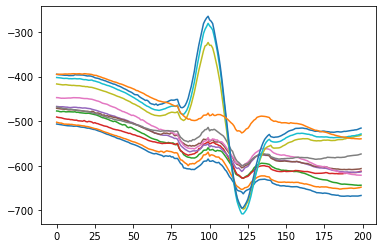

In [18]:
# plot only the 8 channels with the highest amplitude
n_channels = 12 #number of channels to plot
amplitudes = [abs(max(sw.mean_waveforms[n,:])) + abs(min(sw.mean_waveforms[n,:])) for n in range(sw.mean_waveforms.shape[0])]
channel_amp_list = [(c,a) for c,a in zip(amplitudes, range(sw.mean_waveforms.shape[0]))]
channel_amp_dict = dict(channel_amp_list)
amp_sorted_channels = [channel_amp_dict[a] for a in sorted(channel_amp_dict)]
channels = amp_sorted_channels[:(sw.mean_waveforms.shape[0]-n_channels-1):-1]
print(channels)
for n in channels:
    plt.plot(sw.mean_waveforms[n,:])

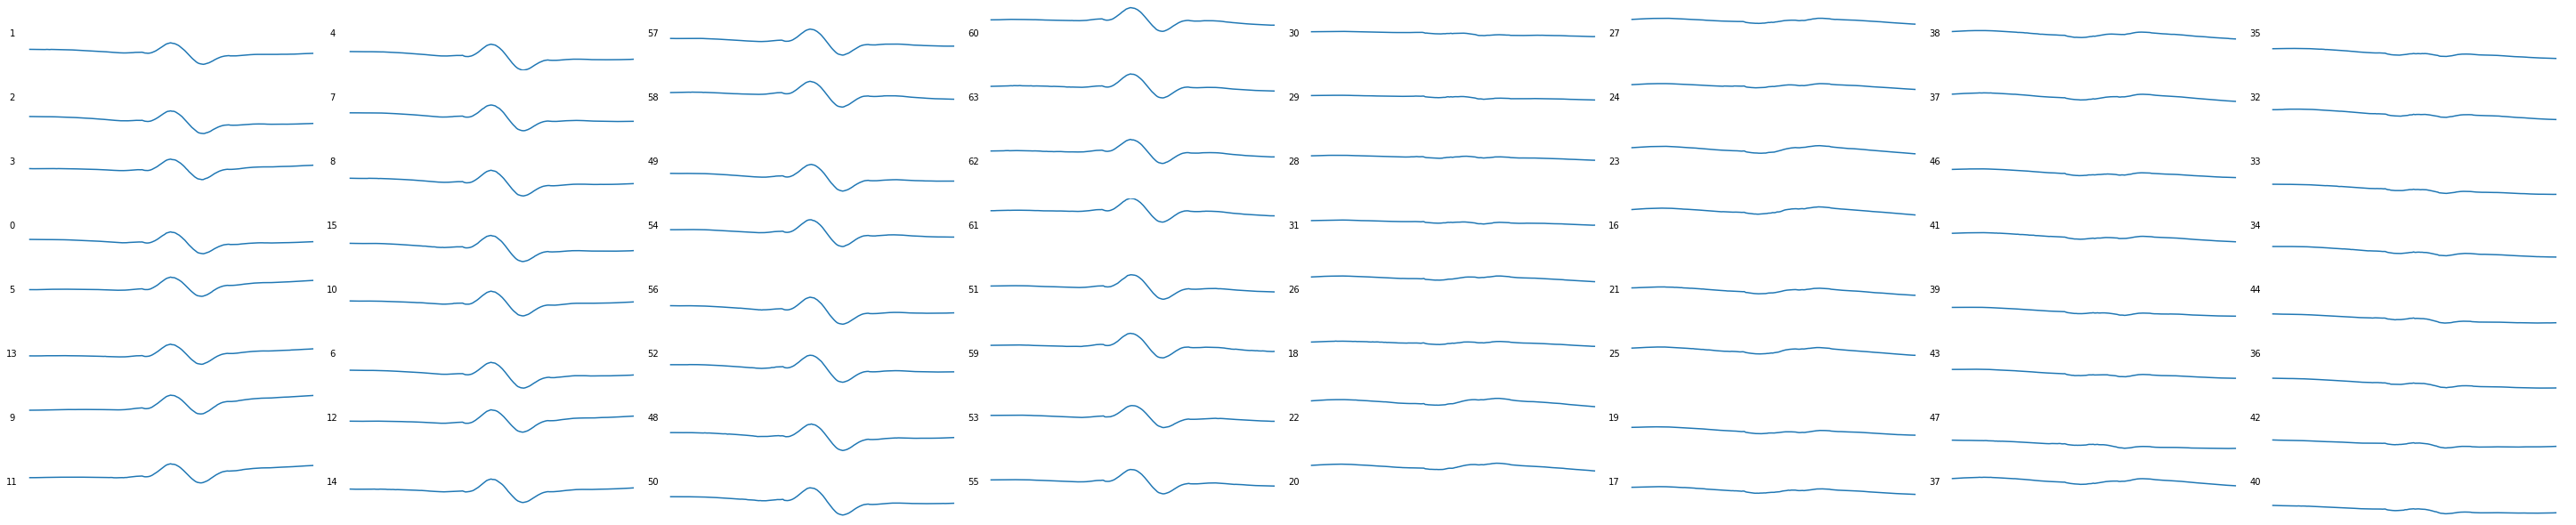

In [19]:
# plot all channels
ch_map = np.load(f"{sesdir}channel_map.npy")
rows = np.repeat(range(8),8)
cols = np.tile(range(8),8)
ax_map = [(col, row) for (row, col) in zip(rows, cols)]

fig, ax = plt.subplots(8,8,figsize=(40,8))
for n in range(sw.mean_waveforms.shape[0]):
    ax[ax_map[n]].plot(sw.mean_waveforms[np.squeeze(ch_map[n]),:])
    ax[ax_map[n]].spines['right'].set_visible(False)
    ax[ax_map[n]].spines['left'].set_visible(False)
    ax[ax_map[n]].spines['top'].set_visible(False)
    ax[ax_map[n]].spines['bottom'].set_visible(False)
    ax[ax_map[n]].set_ylabel(np.squeeze(ch_map[n]), rotation=0)
    ax[ax_map[n]].yaxis.set_ticks([])
    ax[ax_map[n]].set_ylim(sw.mean_waveforms[:,:].min(), sw.mean_waveforms[:,:].max())
    ax[ax_map[n]].get_xaxis().set_visible(False)
fig.tight_layout(pad=0)
plt.show()

In [17]:
ses= sessionNames.sessionName[3] ## select one 32 ch session 
mouse= sessionNames.sessionName[3].split('-')[0]
sesdir= dataPath+'/'+mouse+'/'+ses+ '/'
ch_map_phy = np.load(f"{sesdir}channel_map.npy")
ch_posi_phy = np.load(f"{sesdir}channel_positions.npy")

ses = Kilosort_session(name=ses,path=sesdir)
ses.load_parameters_from_files()

stl=Spike_train_loader(ses)


In [18]:
stl= Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg=Cell_group(stl)

Number of good clusters: 9


In [24]:
n=cg.neuron_list[1]
df = Dat_file_reader(file_names=[f"{ses.fileBase}.dat"], n_channels=33)
sw = Spike_waveform(dat_file=df, spike_train=n.spike_train)


In [25]:
sw.mean_waveform(block_size=200, channels=range(32)) 

[22, 23, 21, 5, 4, 6, 8, 31, 2, 16, 9, 14]


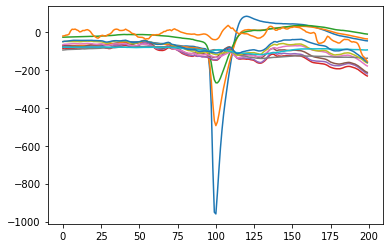

In [26]:
# plot only the 8 channels with the highest amplitude
n_channels = 12 #number of channels to plot
amplitudes = [abs(max(sw.mean_waveforms[n,:])) + abs(min(sw.mean_waveforms[n,:])) for n in range(sw.mean_waveforms.shape[0])]
channel_amp_list = [(c,a) for c,a in zip(amplitudes, range(sw.mean_waveforms.shape[0]))]
channel_amp_dict = dict(channel_amp_list)
amp_sorted_channels = [channel_amp_dict[a] for a in sorted(channel_amp_dict)]
channels = amp_sorted_channels[:(sw.mean_waveforms.shape[0]-n_channels-1):-1]
print(channels)
for n in channels:
    plt.plot(sw.mean_waveforms[n,:])

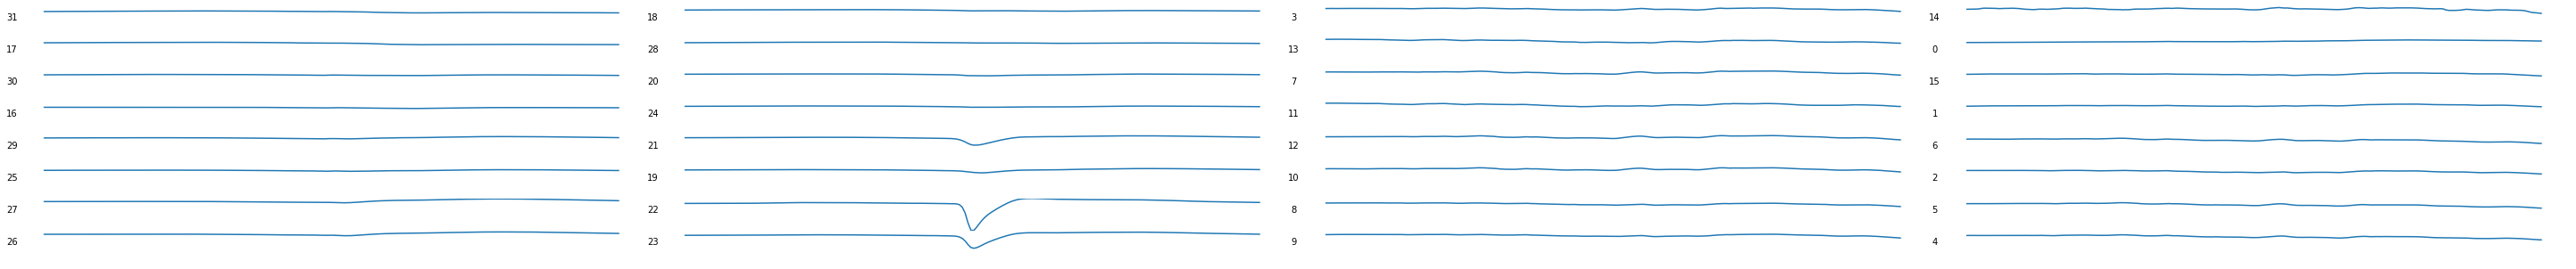

In [27]:
# plot all channels
ch_map = np.load(f"{sesdir}channel_map.npy")
rows = np.repeat(range(4),8)
cols = np.tile(range(8),4)
ax_map = [(col, row) for (row, col) in zip(rows, cols)]

fig, ax = plt.subplots(8,4,figsize=(40,4))
for n in range(sw.mean_waveforms.shape[0]):
    ax[ax_map[n]].plot(sw.mean_waveforms[np.squeeze(ch_map[n]),:])
    ax[ax_map[n]].spines['right'].set_visible(False)
    ax[ax_map[n]].spines['left'].set_visible(False)
    ax[ax_map[n]].spines['top'].set_visible(False)
    ax[ax_map[n]].spines['bottom'].set_visible(False)
    ax[ax_map[n]].set_ylabel(np.squeeze(ch_map[n]), rotation=0)
    ax[ax_map[n]].yaxis.set_ticks([])
    ax[ax_map[n]].set_ylim(sw.mean_waveforms[:,:].min(), sw.mean_waveforms[:,:].max())
    ax[ax_map[n]].get_xaxis().set_visible(False)
fig.tight_layout(pad=0)
plt.show()

In [19]:
ses= sessionNames.sessionName[30] ## select one 128 ch session 
mouse= sessionNames.sessionName[30].split('-')[0]
sesdir= dataPath+'/'+mouse+'/'+ses+ '/'
ch_map_phy = np.load(f"{sesdir}channel_map.npy")
ch_posi_phy = np.load(f"{sesdir}channel_positions.npy")

ses = Kilosort_session(name=ses,path=sesdir)
ses.load_parameters_from_files()

stl=Spike_train_loader(ses)


In [20]:
stl= Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg=Cell_group(stl)

n=cg.neuron_list[1]
df = Dat_file_reader(file_names=[f"{ses.fileBase}.dat"], n_channels=129)
sw = Spike_waveform(dat_file=df, spike_train=n.spike_train)


Number of good clusters: 49


In [ ]:
sw.mean_waveform(block_size=200, channels=range(128)) 

In [ ]:
# plot only the 8 channels with the highest amplitude
n_channels = 8 #number of channels to plot
amplitudes = [abs(max(sw.mean_waveforms[n,:])) + abs(min(sw.mean_waveforms[n,:])) for n in range(sw.mean_waveforms.shape[0])]
channel_amp_list = [(c,a) for c,a in zip(amplitudes, range(sw.mean_waveforms.shape[0]))]
channel_amp_dict = dict(channel_amp_list)
amp_sorted_channels = [channel_amp_dict[a] for a in sorted(channel_amp_dict)]
channels = amp_sorted_channels[:(sw.mean_waveforms.shape[0]-n_channels-1):-1]
print(channels)
for n in channels:
    plt.plot(sw.mean_waveforms[n,:])

In [ ]:
# plot all channels
ch_map = np.load(f"{sesdir}channel_map.npy")
rows = np.repeat(range(16),8)
cols = np.tile(range(8),16)
ax_map = [(col, row) for (row, col) in zip(rows, cols)]

fig, ax = plt.subplots(16,4,figsize=(40,4))
for n in range(sw.mean_waveforms.shape[0]):
    ax[ax_map[n]].plot(sw.mean_waveforms[np.squeeze(ch_map[n]),:])
    ax[ax_map[n]].spines['right'].set_visible(False)
    ax[ax_map[n]].spines['left'].set_visible(False)
    ax[ax_map[n]].spines['top'].set_visible(False)
    ax[ax_map[n]].spines['bottom'].set_visible(False)
    ax[ax_map[n]].set_ylabel(np.squeeze(ch_map[n]), rotation=0)
    ax[ax_map[n]].yaxis.set_ticks([])
    ax[ax_map[n]].set_ylim(sw.mean_waveforms[:,:].min(), sw.mean_waveforms[:,:].max())
    ax[ax_map[n]].get_xaxis().set_visible(False)
fig.tight_layout(pad=0)
plt.show()